# Взять из прошлого домашнего задания ряд (в двух вариантах - стационарный и нет) и приблизить оба эти варианта моделями из класса MA.italicized text

In [0]:
import pandas as pd
import numpy as np

sales_of_company_x = pd.read_csv("../1. Лекция/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("../1. Лекция/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("../1. Лекция/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("../1. Лекция/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("../1. Лекция/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("../1. Лекция/Series/daily-total-female-births-in-cal.csv")

In [0]:
airline_passengers = pd.read_csv("international-airline-passengers.csv")
car_sales = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")
sales_company = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
all_series = {
    "International airline passengers": airline_passengers["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"],
    "Monthly car sales in quebec 1960": car_sales["Count"],
    "Monthly sales of company x jan 6": sales_company["Count"]
}

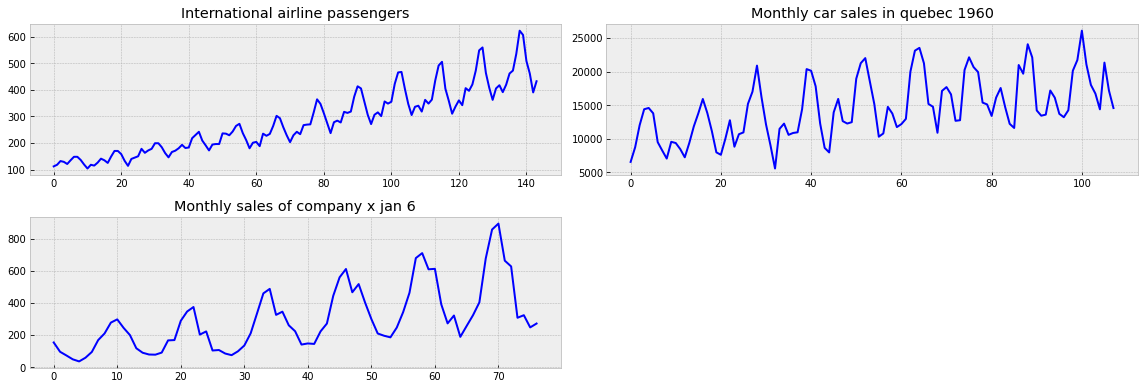

In [10]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Скользящее среднее

Начнем моделирование с наивного предположения - "завтра будет, как вчера", но вместо просто предсказания вида $\hat{y}_{t} = y_{t-1}$ будем считать, что будущее значение переменной зависит от среднего $n$ её предыдущих значений

$\hat{y}_{t} = \frac{1}{k} \displaystyle\sum^{k-1}_{n=0} y_{t-n}$

В данном случае $\hat{y}_{t}$ называется скользящей средней

In [0]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

In [0]:
ser = moving_average(car_sales["Count"], 7)

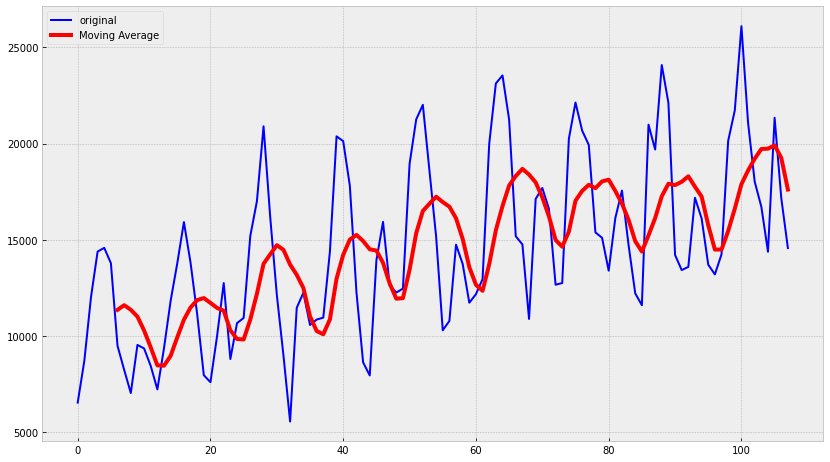

In [13]:
ser = moving_average(car_sales["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(car_sales["Count"], color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

### Практика 1. В настоящем примере функция MA просто усредняет ряд. Напишите функцию, которая предсказывает 5 следующих измерений

In [0]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
    return new_series

In [0]:
series_pred = predict(car_sales["Count"], 7, 50)

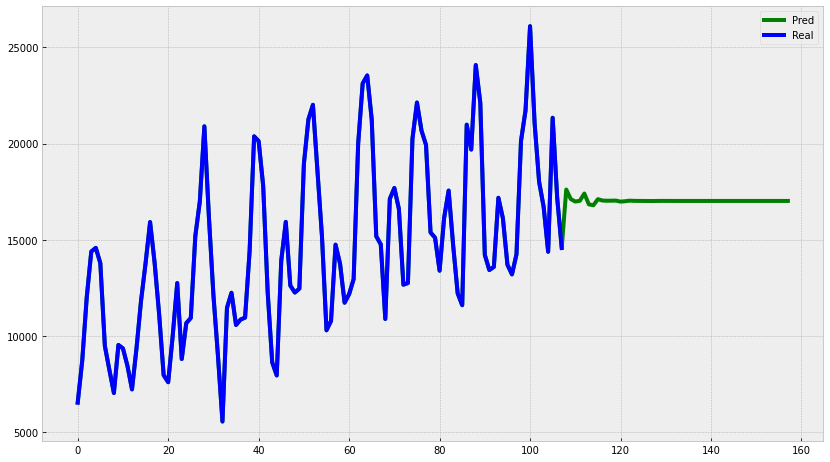

In [16]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(car_sales["Count"], color='blue', linewidth='4', label='Real')
    plt.legend()

Чем больше размер "окна" скользящего среднего $n$ тем более сглаженным получается результат. По нескольким скользящим средним можно увидеть периоды резкого роста и резкого спада.

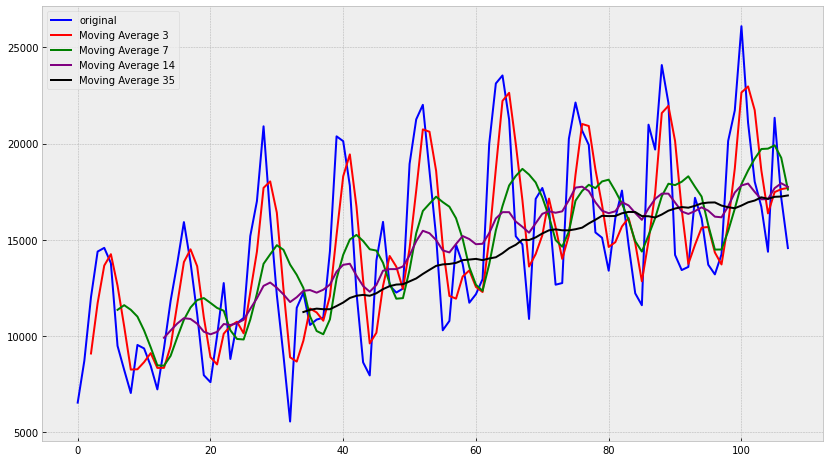

In [17]:
windows = [3,7,14,35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(car_sales["Count"], color='blue',label='original')
    for i in range(len(windows)):
        ser = moving_average(car_sales["Count"], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label='Moving Average {}'.format(windows[i]))
    plt.legend()

Характерная особенность обычного скользящего среднего - повышенная чувствительность к выбросам данных

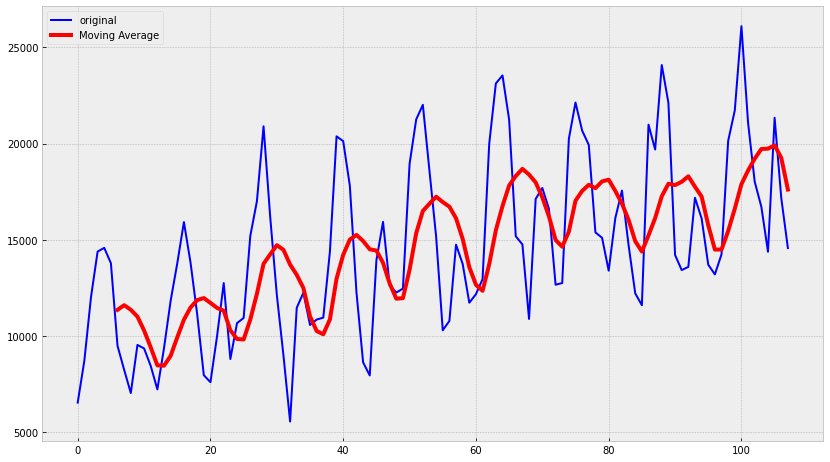

In [22]:
#ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ts= car_sales["Count"]
ser = moving_average(ts, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

В случае сильно зашумленных данных скользящее среднее помогает определить тренд

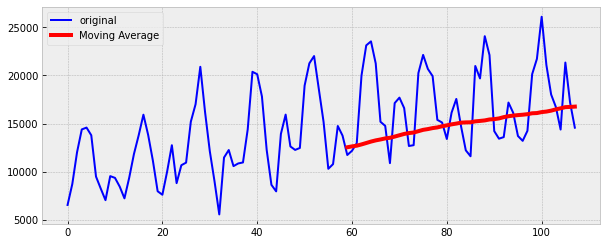

In [19]:
ts = car_sales['Count']
ser = moving_average(ts, 60)
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 4))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()